In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import pingouin as pg
import scipy

There are parametric and nonparametric statistical tests.
* Depending on the normality of your data (meaning if it is a normal distribution or not), you may use a parametric test or a nonparametric test

  * If it is normally distributed, we use a parametric test.
  * If it is not, we use a nonparametric test.

**In this topic, we will cover nonparametric tests**

### Mann-Whitney U Test

A Mann-Whitney U Test is a nonparametric test used to determine if there are differences between two groups where at least one group is not normally distributed.
* The samples should be independent (or unpaired).
* It is a nonparametric version of the independent t-test we saw in the previous unit

Let's consider a DataFrame that has Col1 and Col2 columns generated with a NumPy function to create data that is not normally distributed

In [5]:
np.random.seed(1)
df = pd.DataFrame(data={'Col1':np.random.uniform(low=0, high=1, size=500),
                        "Col2":np.random.uniform(low=0.1, high=1, size=500)})
df.head()

,Col1,Col2
0,0.417022,0.178734
1,0.720324,0.304579
2,0.000114,0.382939
3,0.302333,0.257289
4,0.146756,0.646385


We check for normality. Both are not normally distributed

In [8]:
pg.normality(data=df, alpha=0.05)

,W,pval,normal
Col1,0.947966,2.976057e-12,False
Col2,0.962373,5.252833e-10,False


We plot both columns in a histogram and boxplot to better understand the levels

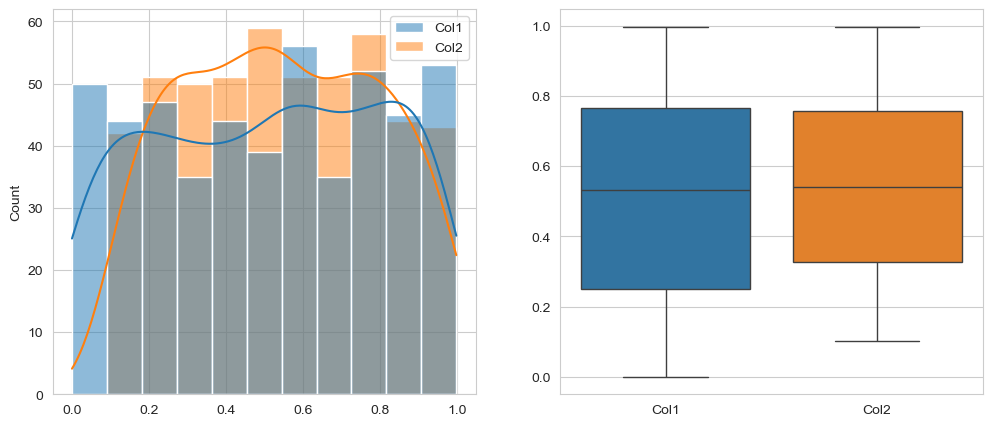

In [11]:
fig, axes = plt.subplots(nrows=1 ,ncols=2 ,figsize=(12,5))
sns.histplot(data=df, kde=True, ax=axes[0])
sns.boxplot(data=df, ax=axes[1])
plt.show()
print("\n\n")

We use `pg.mwu()` to conduct a  Mann-Whitney U Test. The documentation link is [here](https://pingouin-stats.org/build/html/generated/pingouin.mwu.html#pingouin.mwu). The arguments we use are x and y, where we parse the numerical distribution

In [14]:
pg.mwu(x=df['Col1'], y=df['Col2'])

,U-val,alternative,p-val,RBC,CLES
MWU,116963.0,two-sided,0.078437,-0.064296,0.467852


We are interested in p-val, which is 0.0784
* We consider our significant level alpha = 0.05. 
* Since p-value (0.0784) is higher than the alpha, we accept the null hypothesis.

* Therefore there is not enough statistical difference to conclude the levels are different.

### Wilcoxon Test

A Wilcoxon Test is a non-parametric test used when you'd like to use the paired t–test. At least one of the samples should not be **normally distributed**.
* The samples should be **dependent (or paired)**
  * It should be a sample of matched pairs. 
  * For example, **imagine the same group is tested twice**. Say you want to examine the difference between people's scores on a test before and after a training 

Let's consider a DataFrame that has Col3 and Col4 columns made with a Python list

In [18]:
df = pd.DataFrame(data={'Col3':[18.3, 13.3, 16.5, 12.6, 9.5, 13.6, 8.1, 8.9, 10, 8.3, 7.9, 8.1, 13.4],
                        "Col4":[12.7, 11.1, 15.3, 12.7, 10.5, 15.6, 11.2, 14.2, 16.3, 15.5, 19.9, 20.4, 36.8]
                        })
df.head()

,Col3,Col4
0,18.3,12.7
1,13.3,11.1
2,16.5,15.3
3,12.6,12.7
4,9.5,10.5


Let's check for normality. One is not normally distributed; we can use the Wilcoxon test

In [23]:
pg.normality(data=df, alpha=0.05)

,W,pval,normal
Col3,0.879760,0.070778,True
Col4,0.722989,0.000952,False


We plot both columns in a histogram and boxplot to better understand the levels

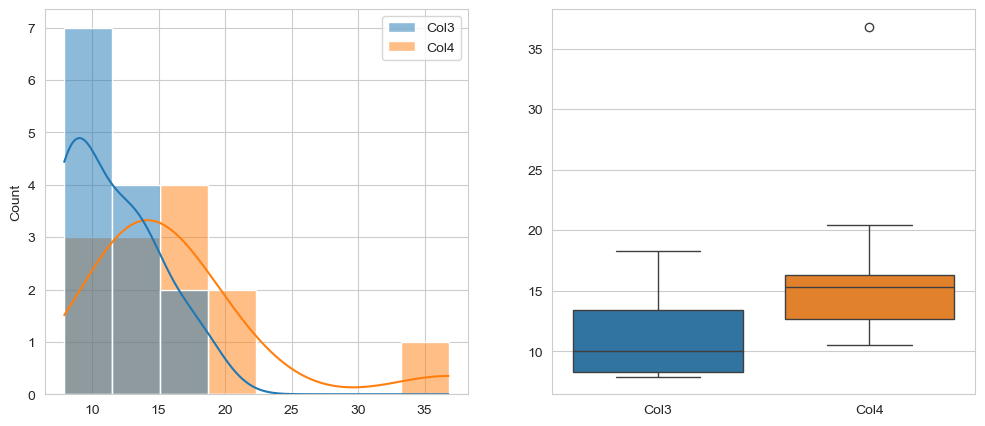

In [26]:
fig, axes = plt.subplots(nrows=1 ,ncols=2 ,figsize=(12,5))
sns.histplot(data=df, kde=True, ax=axes[0])
sns.boxplot(data=df, ax=axes[1])
plt.show()
print("\n\n")

We use `pg.wilcoxon()` to conduct a Wilcoxon Test. The documentation is [here](https://pingouin-stats.org/build/html/generated/pingouin.wilcoxon.html#pingouin.wilcoxon). The arguments we use are x and y, as the numerical data we want to compare.

In [37]:
pg.wilcoxon(x=df['Col3'], y=df['Col4'])

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,16.0,two-sided,0.039795,-0.648352,0.224852


We are interested in the p-val, which is 0.0397
* We consider our significant level alpha = 0.05. 
* Since p-value (0.0397) is lower than the alpha, we reject the null hypothesis.

* Therefore there is enough statistical difference to conclude the levels are different.

### Kruskal-Wallis

A Kruskal-Wallis test is a nonparametric test used to determine if there are differences between three or more groups, considered when at least one of the distributions is not normally distributed
* It is a nonparametric alternative to a one-way ANOVA

We use a pingouin dataset. We will use the Metric and Performance variables to demonstrate the concept in this exercise

In [41]:
df= pg.read_dataset("rm_anova2").filter(['Metric',	'Performance'])
df.head()

,Metric,Performance
0,Product,13
1,Product,12
2,Product,17
3,Product,12
4,Product,19


We want to know the metric distribution levels, so we use `.value_counts()`. There are three levels (action, product and client)

In [44]:
df['Metric'].value_counts()

Metric
Product    20
Client     20
Action     20
Name: count, dtype: int64

We check for normality. One is not, so we can use Kruskal-Wallis

In [47]:
pg.normality(data=df, dv='Performance', group='Metric', alpha=0.05)

,W,pval,normal
Metric,,,
Product,0.886347,0.023054,False
Client,0.935938,0.200725,True
Action,0.955717,0.462202,True


We combine a boxplot and swarm plot to visually check `Performance` across different `Metric`
* **Visually**, we notice few data points. And it looks to have a `Performance` difference across different `Metric`. However, it is **wise** not to conclude anything before conducting a statistical test.

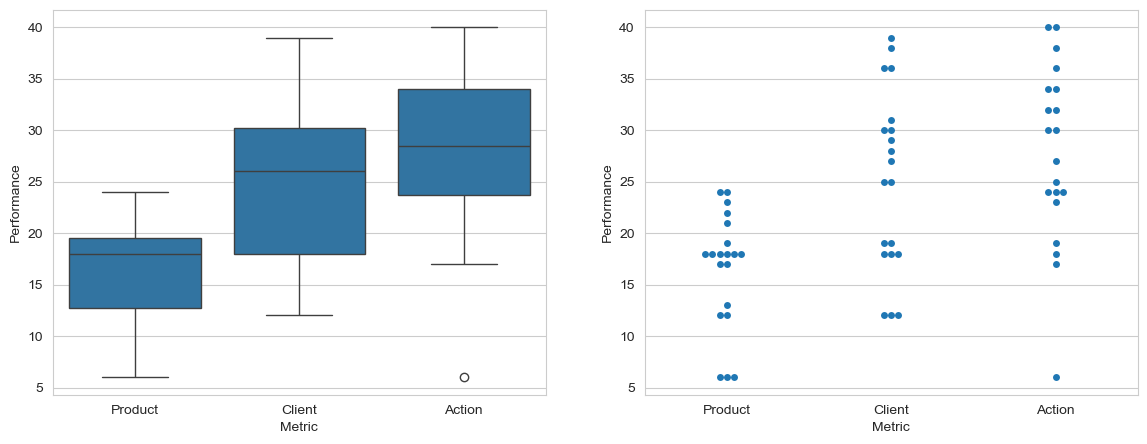

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
sns.boxplot(data=df, x="Metric", y="Performance", ax=axes[0])
sns.swarmplot(data=df, x="Metric", y="Performance", dodge=True, ax=axes[1])
plt.show()

We use `pg.kruskal()` to conduct a Kruskal Wallis test. The documentation is [here](https://pingouin-stats.org/build/html/generated/pingouin.kruskal.html#pingouin.kruskal). The arguments are data, ``dv`` as the dependent variable and ``between`` as the variable, which we will use to analyse the levels in between.

In [53]:
pg.kruskal(data=df, dv='Performance', between='Metric')

,Source,ddof1,H,p-unc
Kruskal,Metric,2,17.914541,0.000129


We are interested in p-unc, which is 0.00012
* We consider our significant level alpha = 0.05. 
* Since p-value (0.00012) is lower than the alpha, we reject the null hypothesis.

* Therefore there is enough statistical difference to conclude the levels are different.